In [ ]:
import pandas as pd

In [ ]:
# visulization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# read data from the csv file
column_names = ["UserID", "StreamID", "Streamer", "StartTime", "StopTime"]
data = pd.read_csv("/content/100k_a.csv", header=None, names=column_names)

In [ ]:
data.head()

,UserID,StreamID,Streamer,StartTime,StopTime
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594


In [ ]:
data.shape

(3051733, 5)

In [ ]:
data.nunique()

UserID       100000
StreamID     739991
Streamer     162625
StartTime      6148
StopTime       6148
dtype: int64

**Data Preprocessing**

In [ ]:
data['TimeSpent'] = data['StopTime'] - data['StartTime']

**Viewer Analysis by Watch Time**

In [ ]:
# number of streamers a user watch

user_no_streamers = data.groupby('UserID')[['Streamer']].nunique().rename(columns={'Streamer': '#Streamer'})
user_no_streamers.head(10)

,#Streamer
UserID,
1,19
2,17
3,8
4,20
5,2
6,10
7,22
8,4
9,11


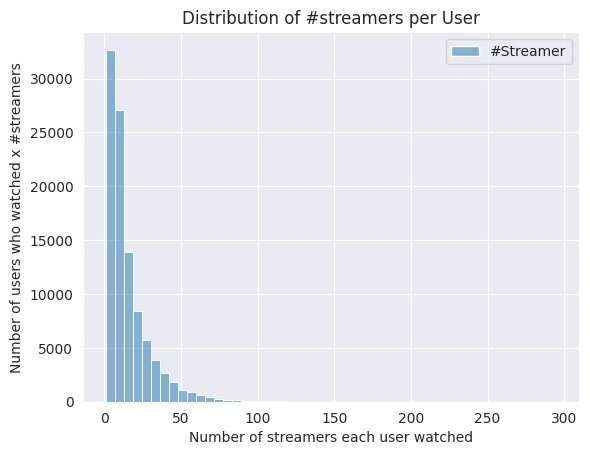

In [ ]:
sns.histplot(user_no_streamers, bins=50)

plt.xlabel('Number of streamers each user watched')
plt.ylabel('Number of users who watched x #streamers')
plt.title('Distribution of #streamers per User')
plt.show()

In [ ]:
user_no_streamers.sort_values('#Streamer', ascending=False).head(10)

,#Streamer
UserID,
43043,295
50084,198
58337,197
14727,196
15026,196
83004,194
91505,192
53803,192
29447,192


In [ ]:
# examining the time spent the userid 43043
data[data['UserID'] == 43043]['TimeSpent'].sum()

729

In [ ]:
# time spent on each streamer by the userid 43043
data[data['UserID'] == 43043].groupby('Streamer')[['TimeSpent']].sum() \
                                                                .sort_values('TimeSpent', ascending=False) \
                                                                .head(10)

,TimeSpent
Streamer,
aurora_peachy,20
krissy,20
seekaysee,17
porta7511,10
itsp3ngu1n,9
smacks,9
chasethekiddd_,9
tylerlevsmusic,8
itsnerdypanda,8


In [ ]:
data[data['UserID'] == 43043].groupby('Streamer')[['TimeSpent']].count() \
                                                                .sort_values('TimeSpent', ascending=False) \
                                                                .rename(columns={'TimeSpent': 'StreamCount'})\
                                                                .head(10)


,StreamCount
Streamer,
porta7511,4
madwifuu,2
celestialfitness,2
nerites,2
nesteggio,2
mrdave123,2
helpinghans,2
ilosomnia,2
pajamalara,2


In [ ]:
# number of time userid 43043 has watched 'aurora_peachy' and 'krissy'
maxuser_stream_count = data[data['UserID'] == 43043].groupby('Streamer')[['TimeSpent']].count().rename(columns={'TimeSpent': 'StreamCount'})
maxuser_stream_count[maxuser_stream_count.index.isin(['aurora_peachy', 'krissy', 'seekaysee'])]

,StreamCount
Streamer,
aurora_peachy,1
krissy,1
seekaysee,2


In [ ]:
# number of streams 'aurora_peachy' and 'krissy' has watched
data[data['Streamer'].isin(['aurora_peachy', 'krissy', 'seekaysee'])][['Streamer', 'StreamID']] \
                        .groupby('Streamer')['StreamID'] \
                        .nunique()

Streamer
aurora_peachy    23
krissy            3
seekaysee         3
Name: StreamID, dtype: int64

**Viewer Analysis by Number of Streams**

In [ ]:
# examine the number of unique streams by users
user_stream_count = data.groupby('UserID')[['StreamID']].nunique().rename(columns={'StreamID': 'StreamCount'})
user_stream_count.sort_values('StreamCount', ascending=False).head(15)

,StreamCount
UserID,
42161,327
43043,319
17309,309
9308,305
99304,304
45796,298
67131,295
75466,292
83683,291


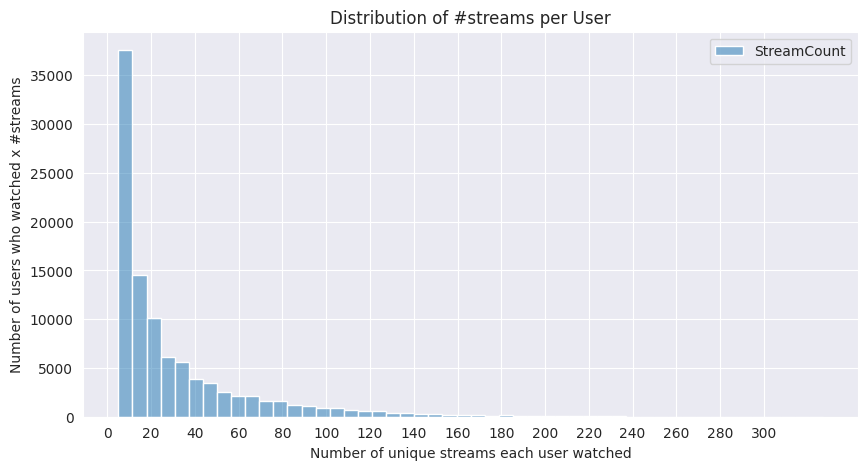

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
sns.histplot(user_stream_count, bins=50, legend=True)

plt.xlabel('Number of unique streams each user watched')
plt.ylabel('Number of users who watched x #streams')
plt.title('Distribution of #streams per User')
plt.xticks(np.arange(0, 301, step=20))
plt.show()

In [ ]:
user_watchtime = data.groupby('UserID')[['TimeSpent']].sum().merge(user_stream_count, left_index=True, right_index=True)
user_watchtime['AvgTime'] = user_watchtime['TimeSpent'] / user_watchtime['StreamCount']
user_watchtime.head(10)

,TimeSpent,StreamCount,AvgTime
UserID,,,
1,117,50,2.340000
2,68,37,1.837838
3,32,17,1.882353
4,96,58,1.655172
5,19,7,2.714286
6,10,10,1.000000
7,245,46,5.326087
8,24,5,4.800000
9,41,19,2.157895


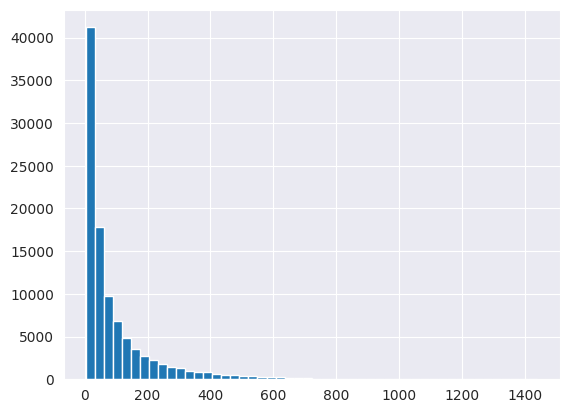

In [ ]:
plt.hist(user_watchtime.TimeSpent, bins=50)
plt.show()

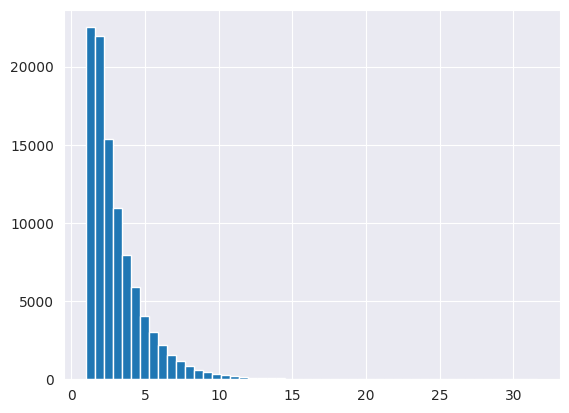

In [ ]:
plt.hist(user_watchtime.AvgTime, bins=50)
plt.show()

In [ ]:
user_watchtime.describe()

,TimeSpent,StreamCount,AvgTime
count,100000.000000,100000.000000,100000.000000
mean,95.887110,30.517330,3.036405
std,127.872463,34.179094,2.013378
min,5.000000,5.000000,1.000000
25%,19.000000,8.000000,1.666667
50%,45.000000,16.000000,2.428571
75%,116.000000,39.000000,3.757441
max,1438.000000,327.000000,31.600000


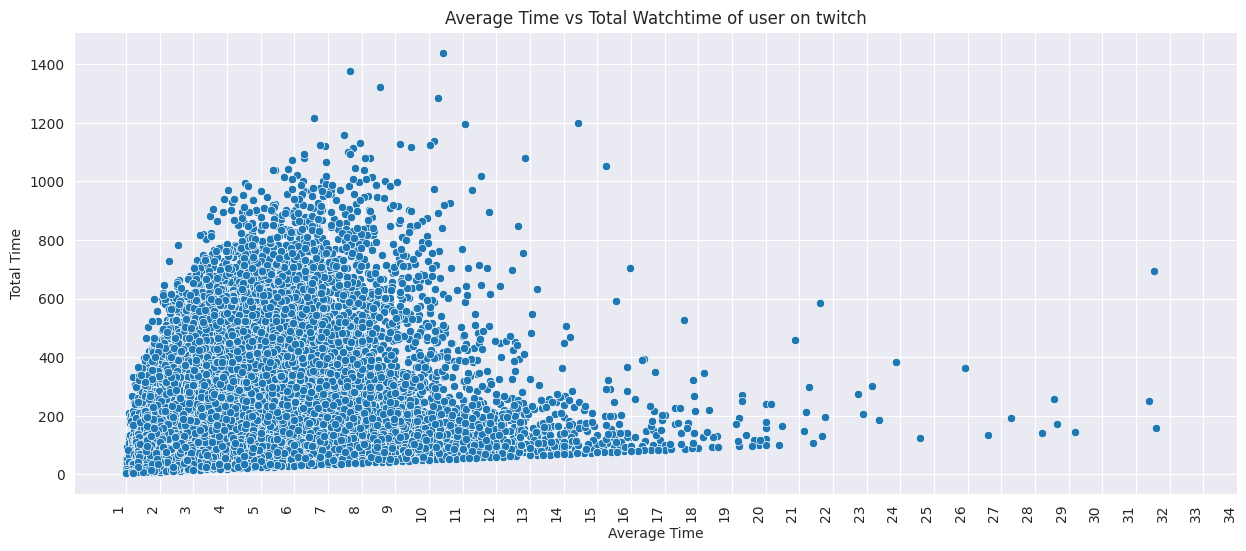

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=user_watchtime, x='AvgTime', y='TimeSpent')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Average Time')
plt.ylabel('Total Time')
plt.xticks(np.arange(1, 35, step=1))
plt.title('Average Time vs Total Watchtime of user on twitch')
plt.show()

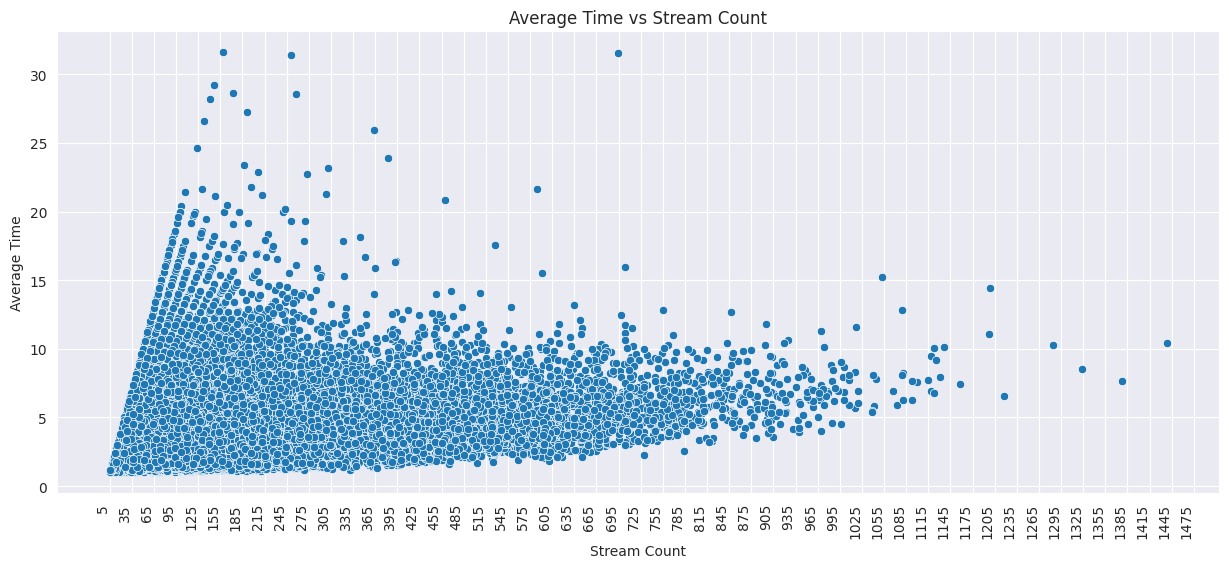

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=user_watchtime, x='TimeSpent', y='AvgTime')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Stream Count')
plt.ylabel('Average Time')
plt.xticks(np.arange(5, 1500, step=30))
plt.title('Average Time vs Stream Count')
plt.show()

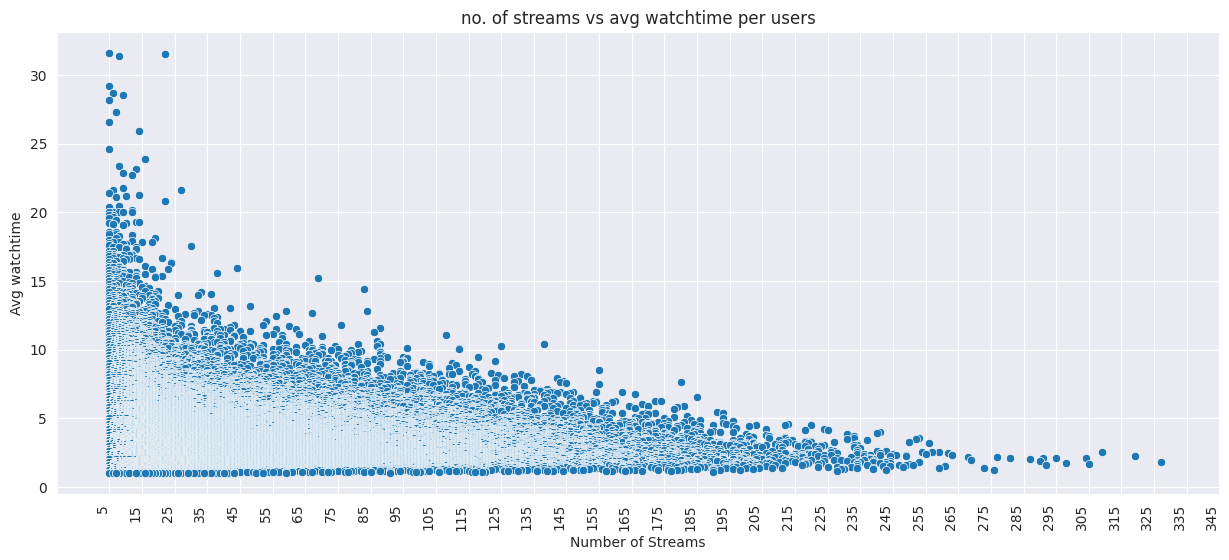

In [ ]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data=user_watchtime.sort_values('AvgTime', ascending=False), x='StreamCount', y='AvgTime')
plt.xlabel('Number of Streams')
plt.ylabel('Avg watchtime')
plt.xticks(np.arange(5, 350, step=10), rotation=90, ha='right')
plt.title('no. of streams vs avg watchtime per users')
plt.show()

**Streamer Analysis by Watchtime**

In [ ]:
# streamer popularity by total watch time of all users
data.groupby('Streamer')[['TimeSpent']].sum().sort_values('TimeSpent', ascending=False).head(15)

,TimeSpent
Streamer,
ninja,111494
tfue,106672
shroud,74934
riotgames,71148
asmongold,54070
sodapoppin,52260
dakotaz,43059
summit1g,42724
xqcow,40716


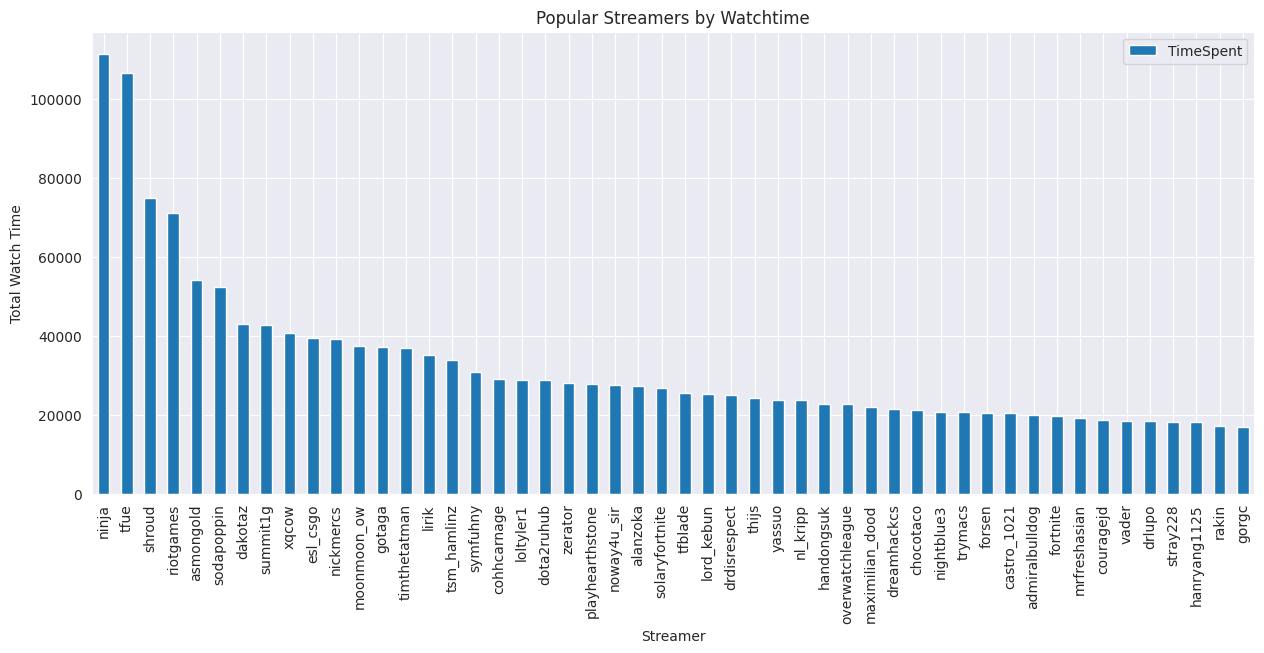

In [ ]:
data.groupby('Streamer')[['TimeSpent']].sum().sort_values('TimeSpent', ascending=False).head(50).plot(kind='bar', figsize=(15, 6))
plt.ylabel('Total Watch Time')
plt.title('Popular Streamers by Watchtime')
plt.show()

In [ ]:
# streamer popularity by viewer count
data.groupby('Streamer')[['UserID']].count() \
                                    .sort_values('UserID', ascending=False) \
                                    .rename(columns={'UserID': 'TotalViewer'}) \
                                    .head(15)

,TotalViewer
Streamer,
ninja,45144
tfue,40136
shroud,27362
riotgames,17633
sodapoppin,14590
nickmercs,14047
dakotaz,13902
asmongold,13186
summit1g,13039


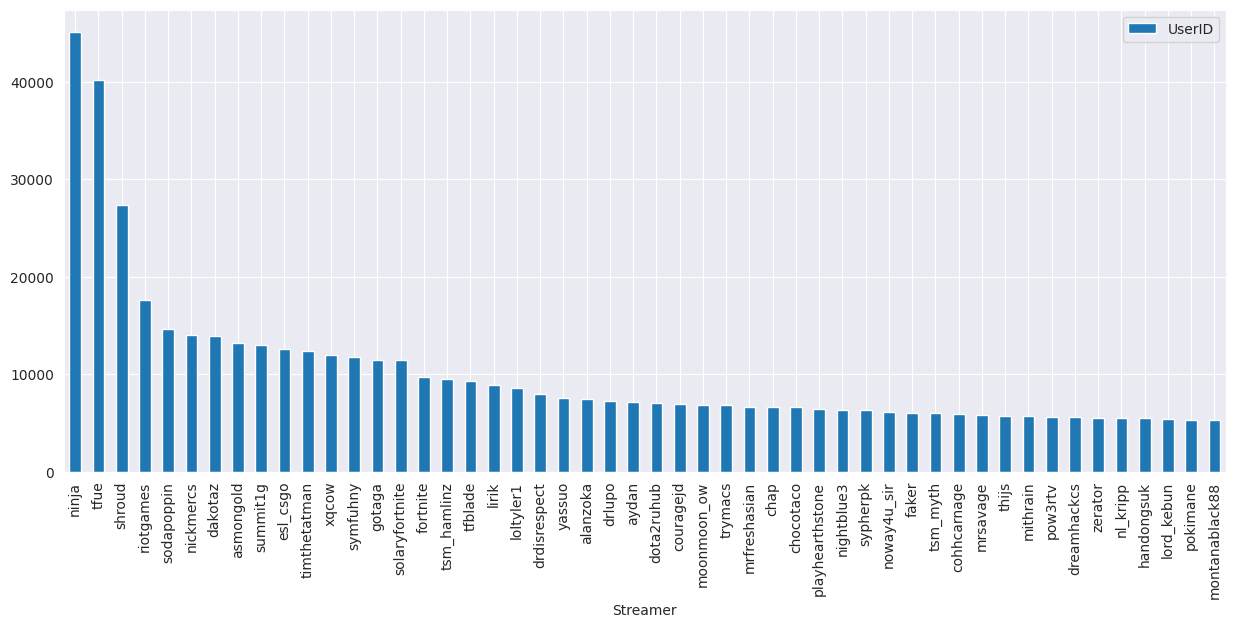

In [ ]:
axs = data.groupby('Streamer')[['UserID']].count().sort_values('UserID', ascending=False).head(50).plot(kind='bar', figsize=(15, 6))
plt.show()

In [ ]:
# view count of individual live stream of streamers.
streamer_stream_view = data.groupby(['Streamer', 'StreamID'])[['UserID']].count() \
                                                                                .sort_values('UserID', ascending=False) \
                                                                                .rename(columns={'UserID': 'ViewCount'}) \
                                                                                .reset_index()
streamer_stream_view.head(10)

,Streamer,StreamID,ViewCount
0,tfue,34265480032,2123
1,ninja,34195155728,1997
2,tfue,34254041488,1836
3,tfue,34000965936,1826
4,ninja,34401244464,1771
5,ninja,34046930480,1760
6,ninja,33997972624,1673
7,tfue,34379640832,1672
8,tfue,34104883024,1576
9,tfue,34185882352,1576


In [ ]:
# data transformation to calculate streamer average viewer counts
streamer_total_view = streamer_stream_view.groupby(['Streamer'])[['ViewCount']].sum()
streamer_total_stream = streamer_stream_view.groupby(['Streamer'])[['ViewCount']].count()

streamer_avg_view = streamer_total_view / streamer_total_stream
streamer_avg_view.rename(columns={'ViewCount': 'AvgView'}, inplace=True)
streamer_avg_view.sort_values(by='AvgView', ascending=False, inplace=True)
streamer_avg_view.head(10)

,AvgView
Streamer,
tfue,1146.742857
ninja,1128.600000
shroud,636.325581
sodapoppin,455.937500
riotgames,452.128205
fortnite,403.500000
asmongold,387.823529
nickmercs,379.648649
faker,375.375000


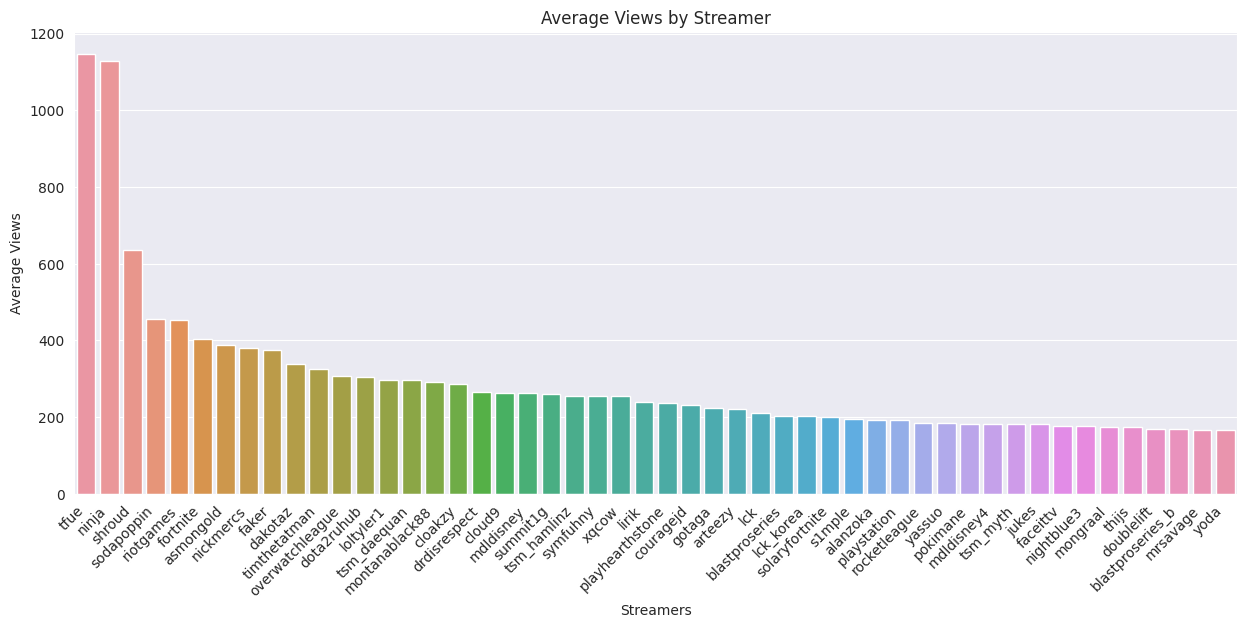

In [ ]:
# Visualizing the average view count of popular streamers
plt.figure(figsize=(15, 6))
sns.barplot(x='Streamer', y='AvgView',
            data=streamer_avg_view.reset_index().sort_values(by='AvgView', ascending=False).head(50))

plt.xlabel('Streamers')
plt.ylabel('Average Views')
plt.title('Average Views by Streamer')
plt.xticks(rotation=45, ha='right')
plt.show()